# Artificial Intelligence - Local Search

Local Search Implementation to Search Solution for Diagonal Magic Cube.

## 0. Initiation

### 0.1 Import Modules

In [23]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Initiate Cubes and Global Variables

In [24]:
init_cube1 = [[[i+(5*j)+(25*k) for i in range(1,6)] for j in range(0,5)] for k in range(0,5)]
init_cube2 = [[[((i+(5*j)+(25*k)+42)%125 + 1) for i in range(1,6)] for j in range(0,5)] for k in range(0,5)]
init_cube3 = [[[((i+(5*j)+(25*k)+84)%125 + 1) for i in range(1,6)] for j in range(0,5)] for k in range(0,5)]
init_cubes = [np.array(init_cube1).flatten().tolist(),
                  np.array(init_cube2).flatten().tolist(),
                  np.array(init_cube3).flatten().tolist()]

In [25]:
num_experiment = 3

### 0.3 Utils

In [26]:
def displayMatrixLayers(cube):
    matrix_3d = np.array(cube)
    global_min = matrix_3d.min()
    global_max = matrix_3d.max()

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    for i in range(5):
        layer = matrix_3d[i, :, :]
        
        row = i // 3
        col = i % 3

        sns.heatmap(layer, annot=True, fmt='d', cmap='plasma', ax=axes[row, col], 
                    cbar=False,
                    vmin=global_min,
                    vmax=global_max, 
                    xticklabels=[],
                    yticklabels=[])

        axes[row, col].set_title(f'Matrix Level {i + 1}')

    for j in range(i + 1, 6):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

In [27]:
def displayPlotValuePerIteration(values):
    array = np.array(values)
    
    x = np.arange(1, len(array) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(x, array, marker='o', linestyle='-', color='b', label='Objective Function Value')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function Value')
    plt.title('Objective Function per Iteration')
    plt.legend()
    plt.grid(True)
    plt.show()

In [28]:
def displayPlotProbabilityMove(probs):
    data = probs
    
    x = np.array(list(data.keys()))
    y = np.array(list(data.values()))

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, marker='o', linestyle='-', color='r', label='Move Probability')
    plt.xlabel('Iteration')
    plt.ylabel('Move Probability')
    plt.title('Move Probability')
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.show()

## 1. Steepest Ascent Hill-climbing

### 1.0. Program

In [29]:
from SteepestAscentHillClimbing import SteepestAscentHillClimbingCube
execution_time_each_experiment = []
cubes_each_experiment = []
values_each_experiment = []
iteration_each_experiment = []
for cube in init_cubes:
    start_time = time.perf_counter()
    cubes, values, count_iter = SteepestAscentHillClimbingCube(cube)
    end_time = time.perf_counter()
    execution_time_each_experiment.append(end_time-start_time)
    
    cubes_each_experiment.append(cubes)
    values_each_experiment.append(values)
    iteration_each_experiment.append(count_iter)

Current val:  13
Current val:  14
Current val:  15
Current val:  16
Current val:  17
Current val:  19
Current val:  20
Current val:  22
Current val:  23
Current val:  24
Current val:  25
Current val:  26
Current val:  27
Current val:  28
Current val:  29
Current val:  30
Current val:  31
Current val:  32
Current val:  33
Current val:  34
Current val:  35
Current val:  36
Current val:  37
Current val:  38
Current val:  39
Current val:  40
Current val:  41
Current val:  42
Current val:  43
Current val:  44
Current val:  1
Current val:  6
Current val:  9
Current val:  12
Current val:  14
Current val:  16
Current val:  18
Current val:  19
Current val:  21
Current val:  23
Current val:  24
Current val:  25
Current val:  27
Current val:  28
Current val:  29
Current val:  31
Current val:  32
Current val:  33
Current val:  34
Current val:  35
Current val:  36
Current val:  37
Current val:  38
Current val:  39
Current val:  40
Current val:  41
Current val:  42
Current val:  43
Current val:  4
C

### 1.1. First Experiment Result

In [30]:
print("Total iteration: ", iteration_each_experiment[0])
print("Execution time: ", execution_time_each_experiment[0])

Total iteration:  30
Execution time:  25.05974195804447


#### 1.1.1. Initial State

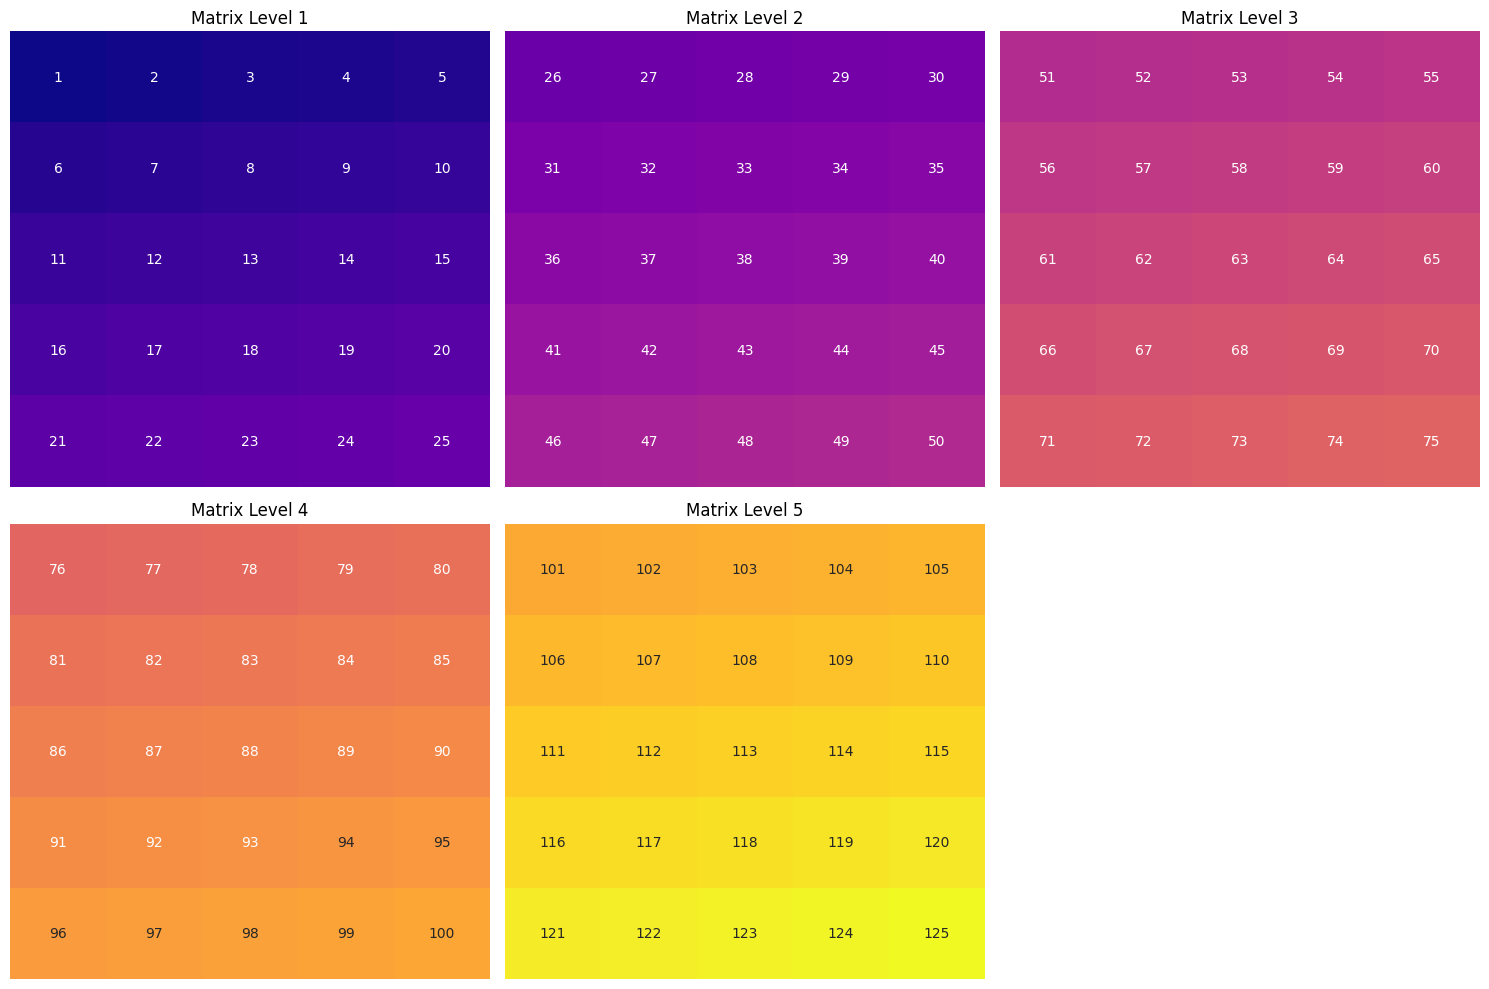

Objective Function Value:  13


In [31]:
displayMatrixLayers(cubes_each_experiment[0][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][0])

#### 1.1.2. Final State

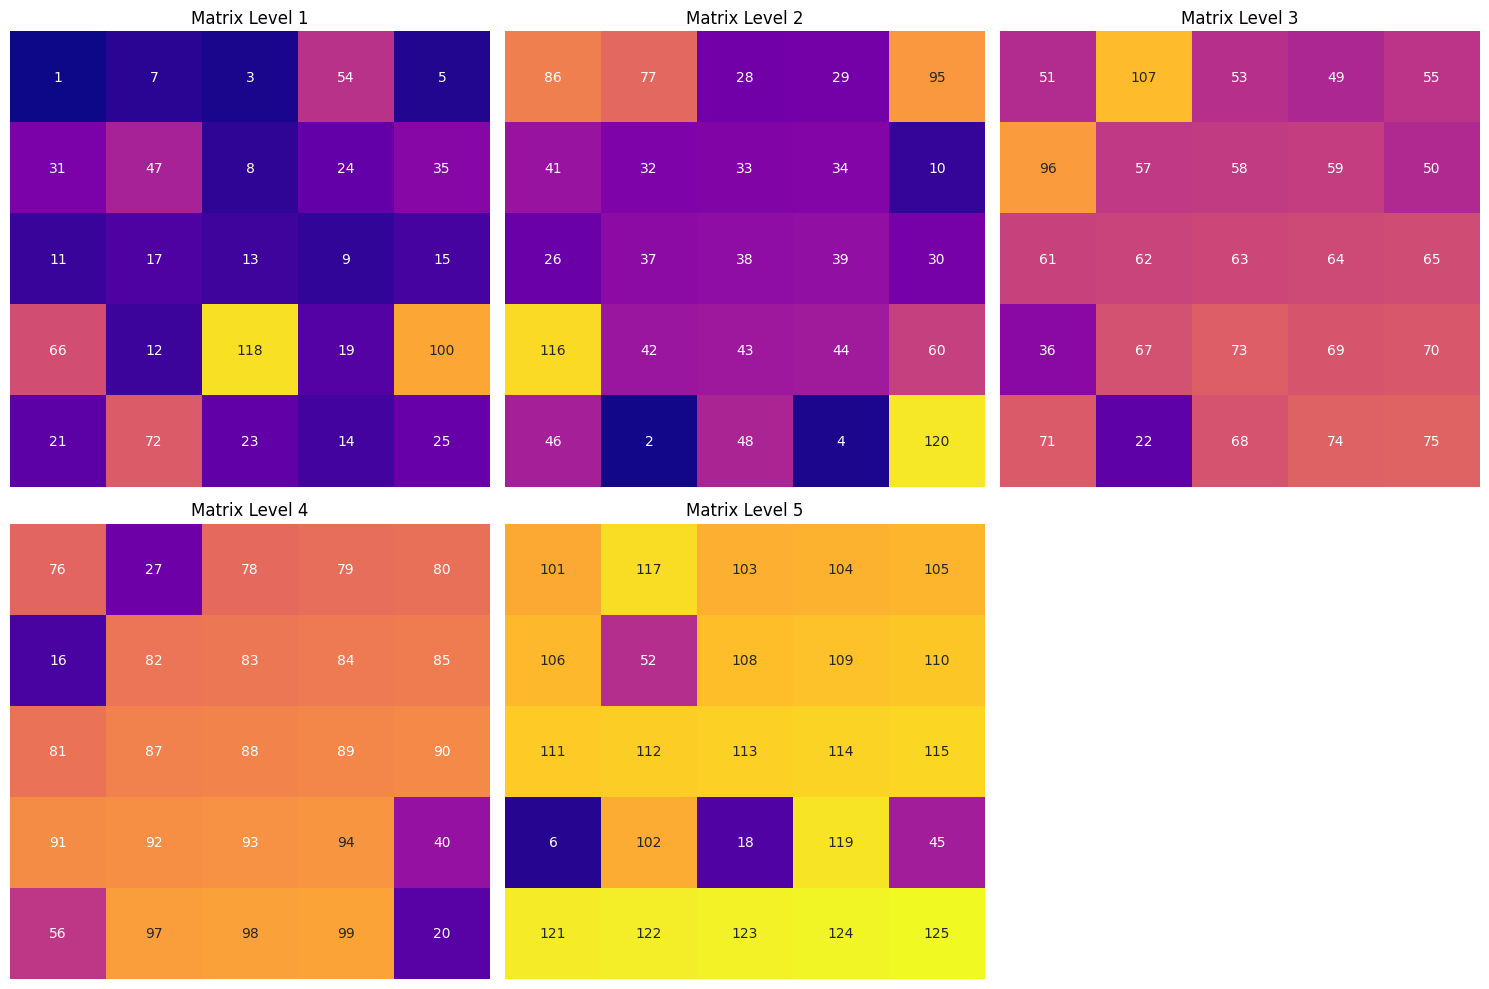

Objective Function Value:  44


In [32]:
displayMatrixLayers(cubes_each_experiment[0][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][-1])

#### 1.1.3. Objective Function Value Plot on Each Iteration

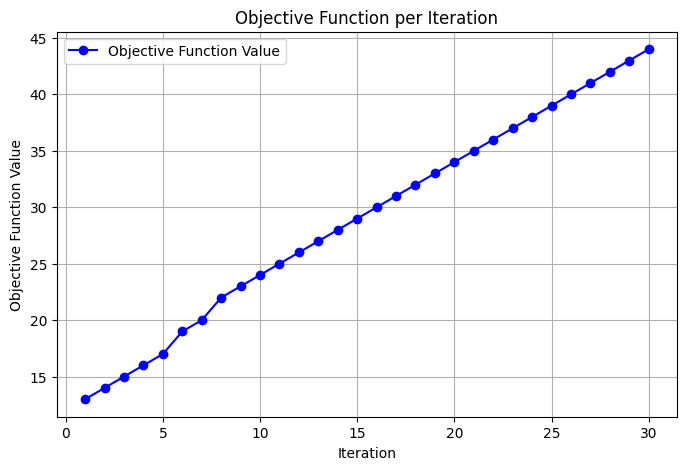

In [33]:
displayPlotValuePerIteration(values_each_experiment[0])

### 1.2. Second Experiment Result

#### 1.2.1. Initial State

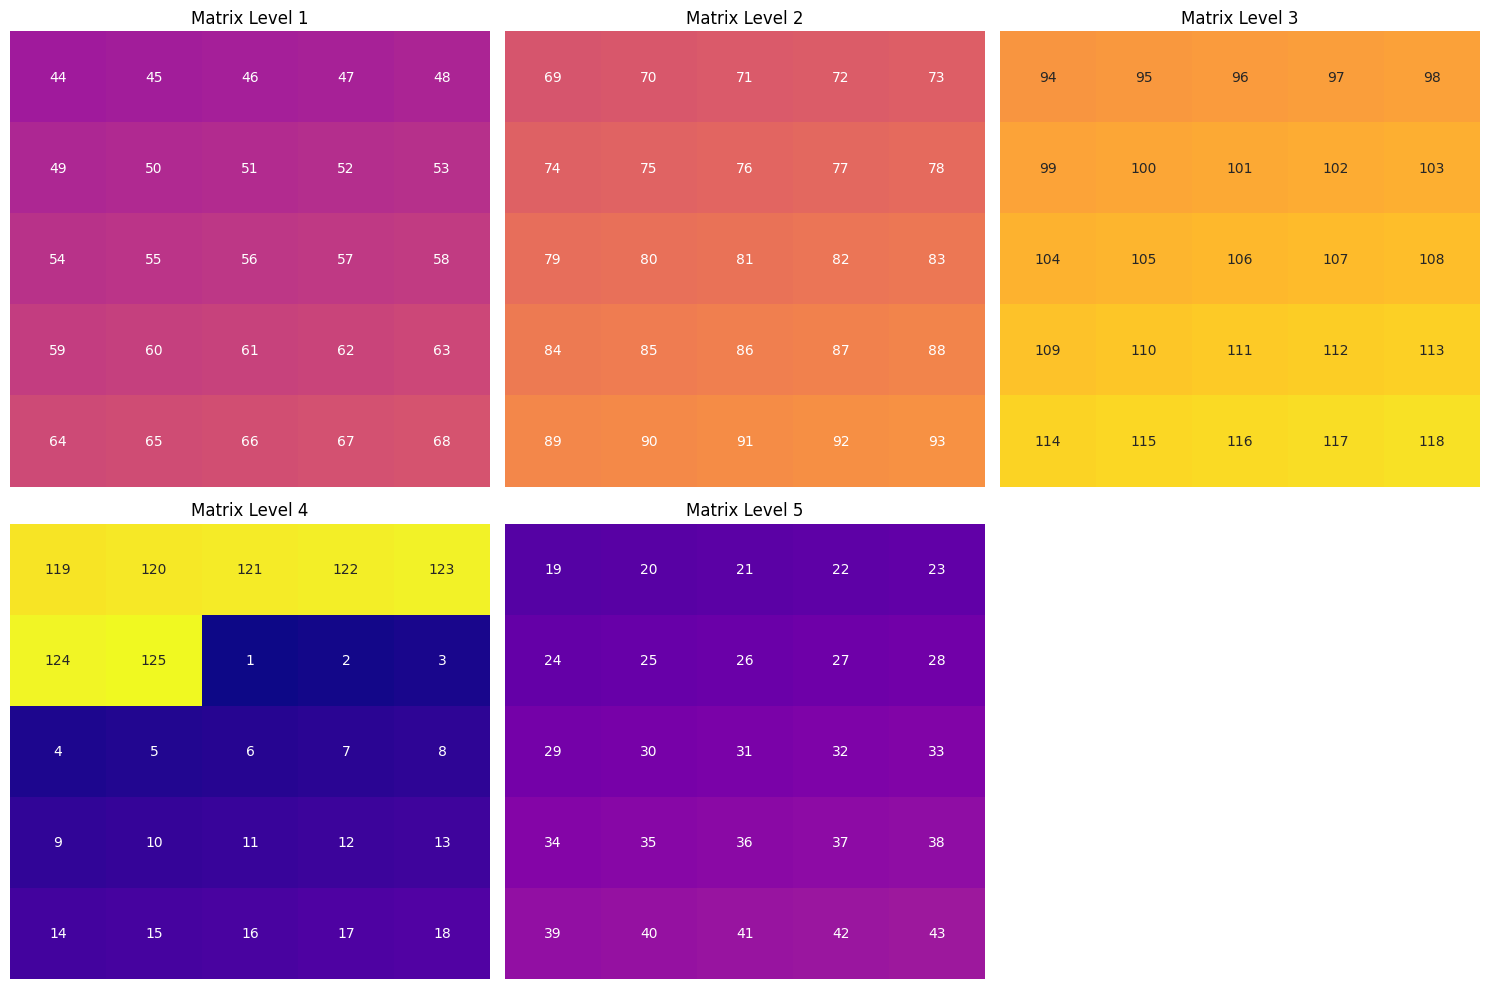

Objective Function Value:  1


In [34]:
displayMatrixLayers(cubes_each_experiment[1][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][0])

#### 1.2.2. Final State

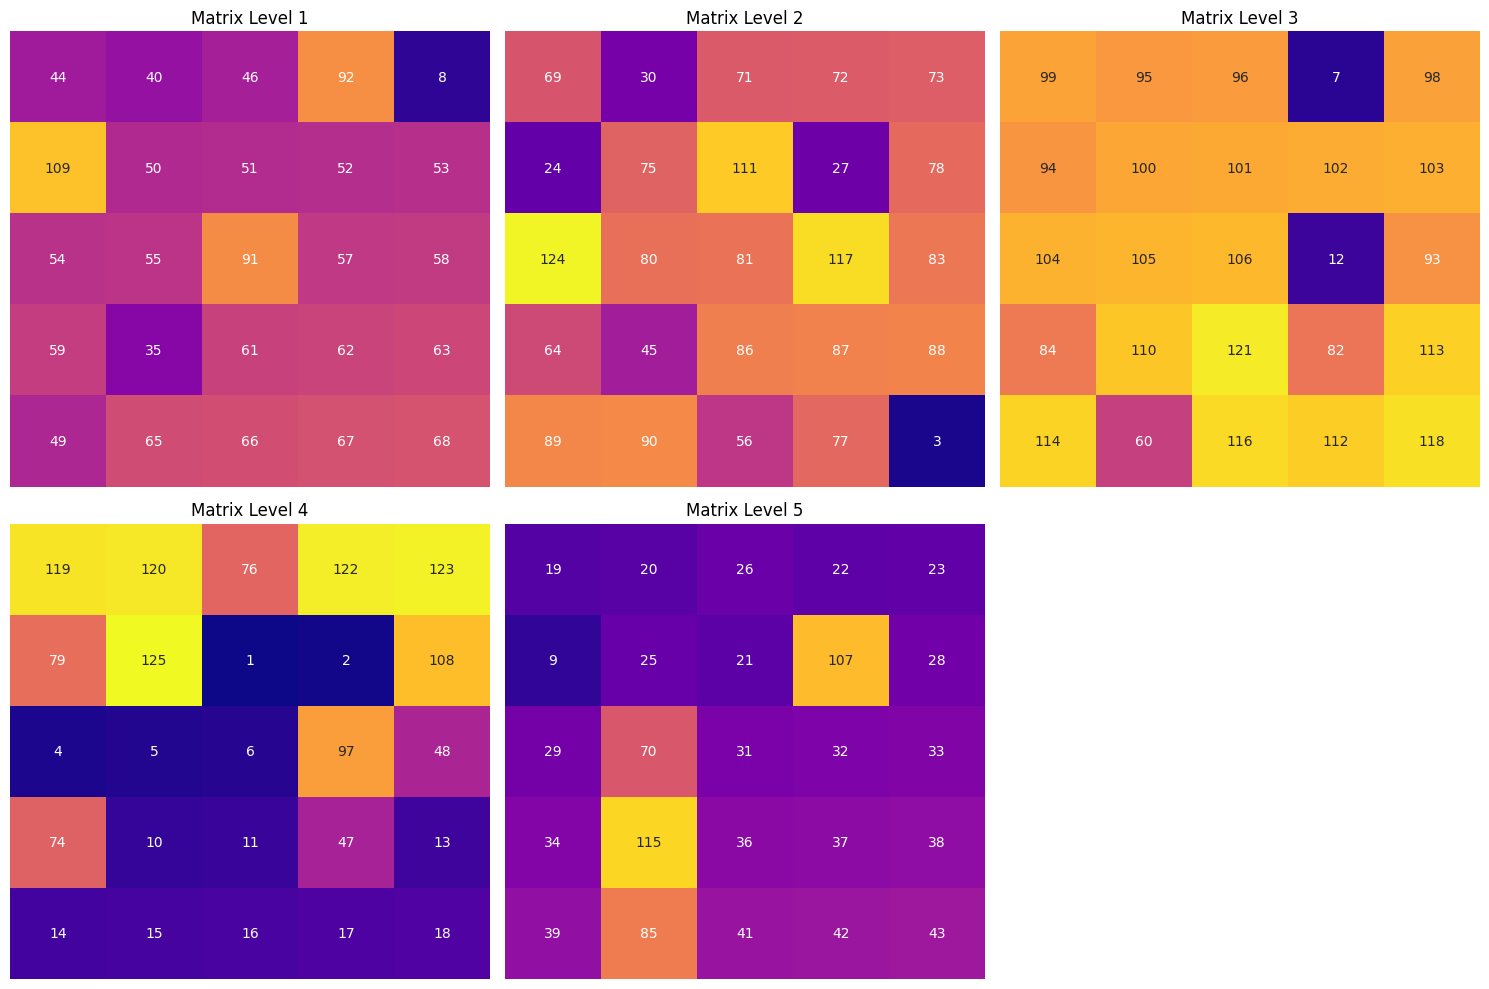

Objective Function Value:  43


In [35]:
displayMatrixLayers(cubes_each_experiment[1][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][-1])

#### 1.2.3. Objective Function Value Plot on Each Iteration

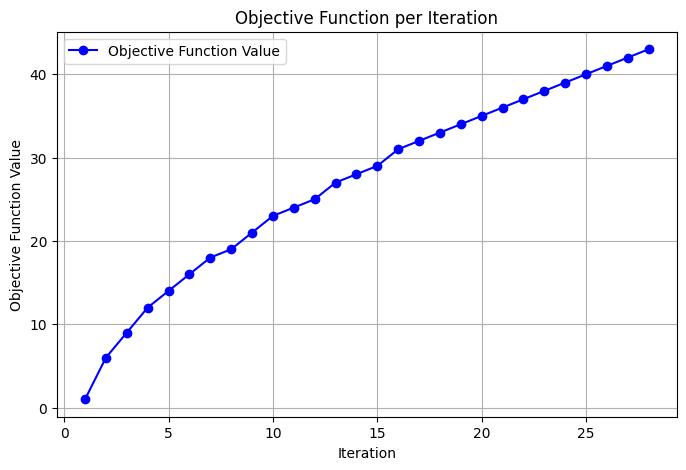

In [36]:
displayPlotValuePerIteration(values_each_experiment[1])

### 1.3. Third Experiment Result

#### 1.3.1. Initial State

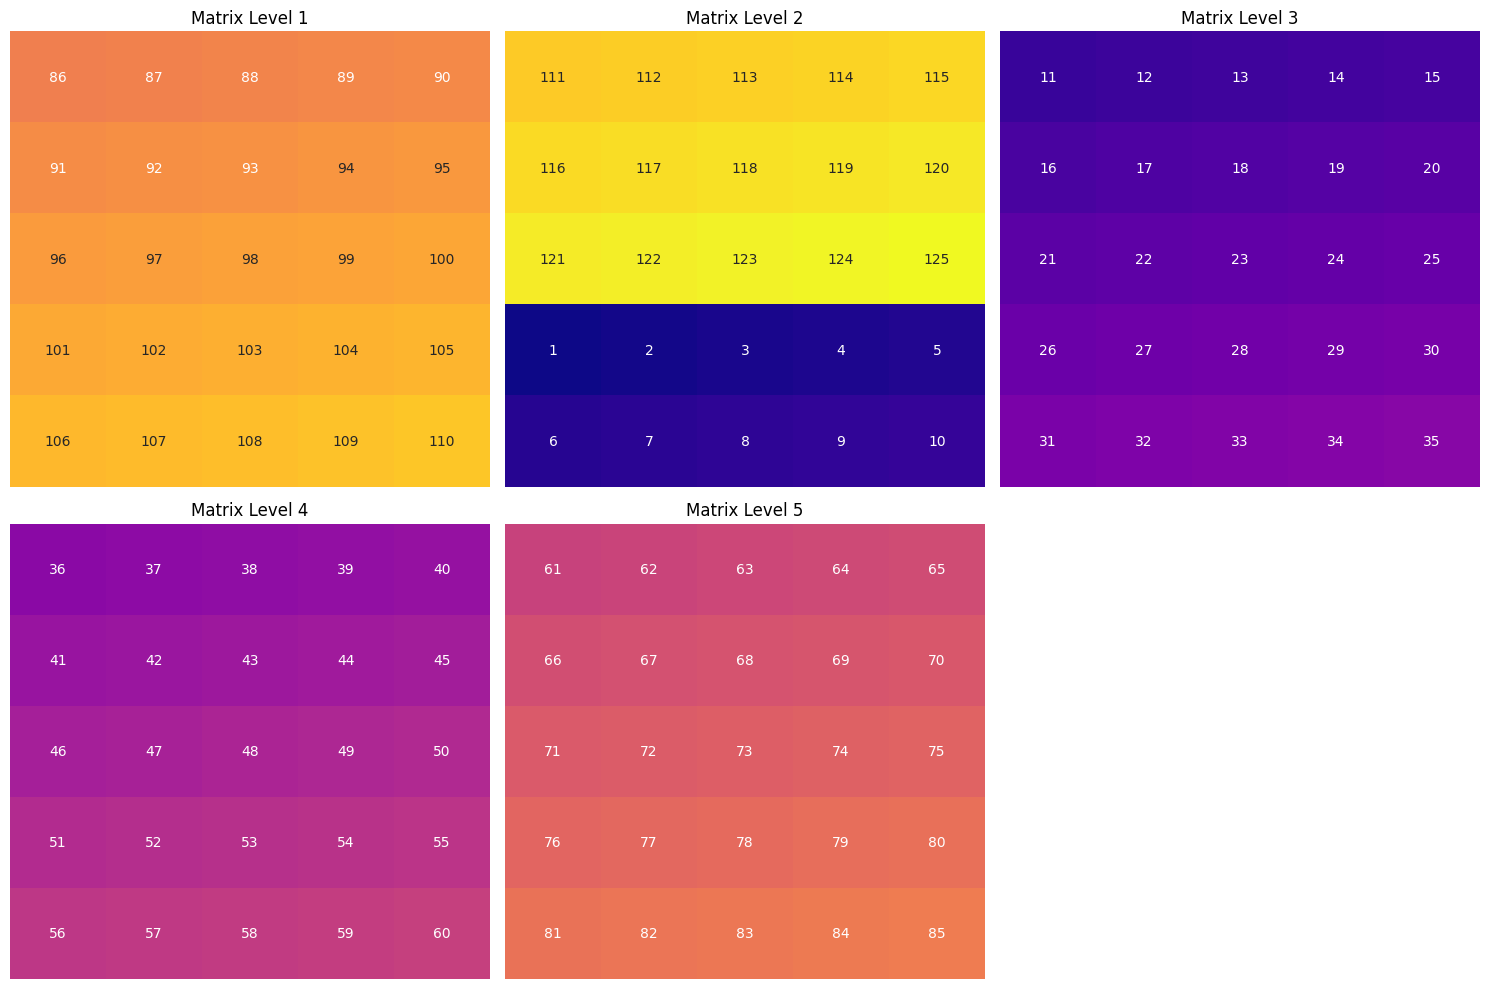

Objective Function Value:  4


In [37]:
displayMatrixLayers(cubes_each_experiment[2][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][0])

#### 1.3.2. Final State

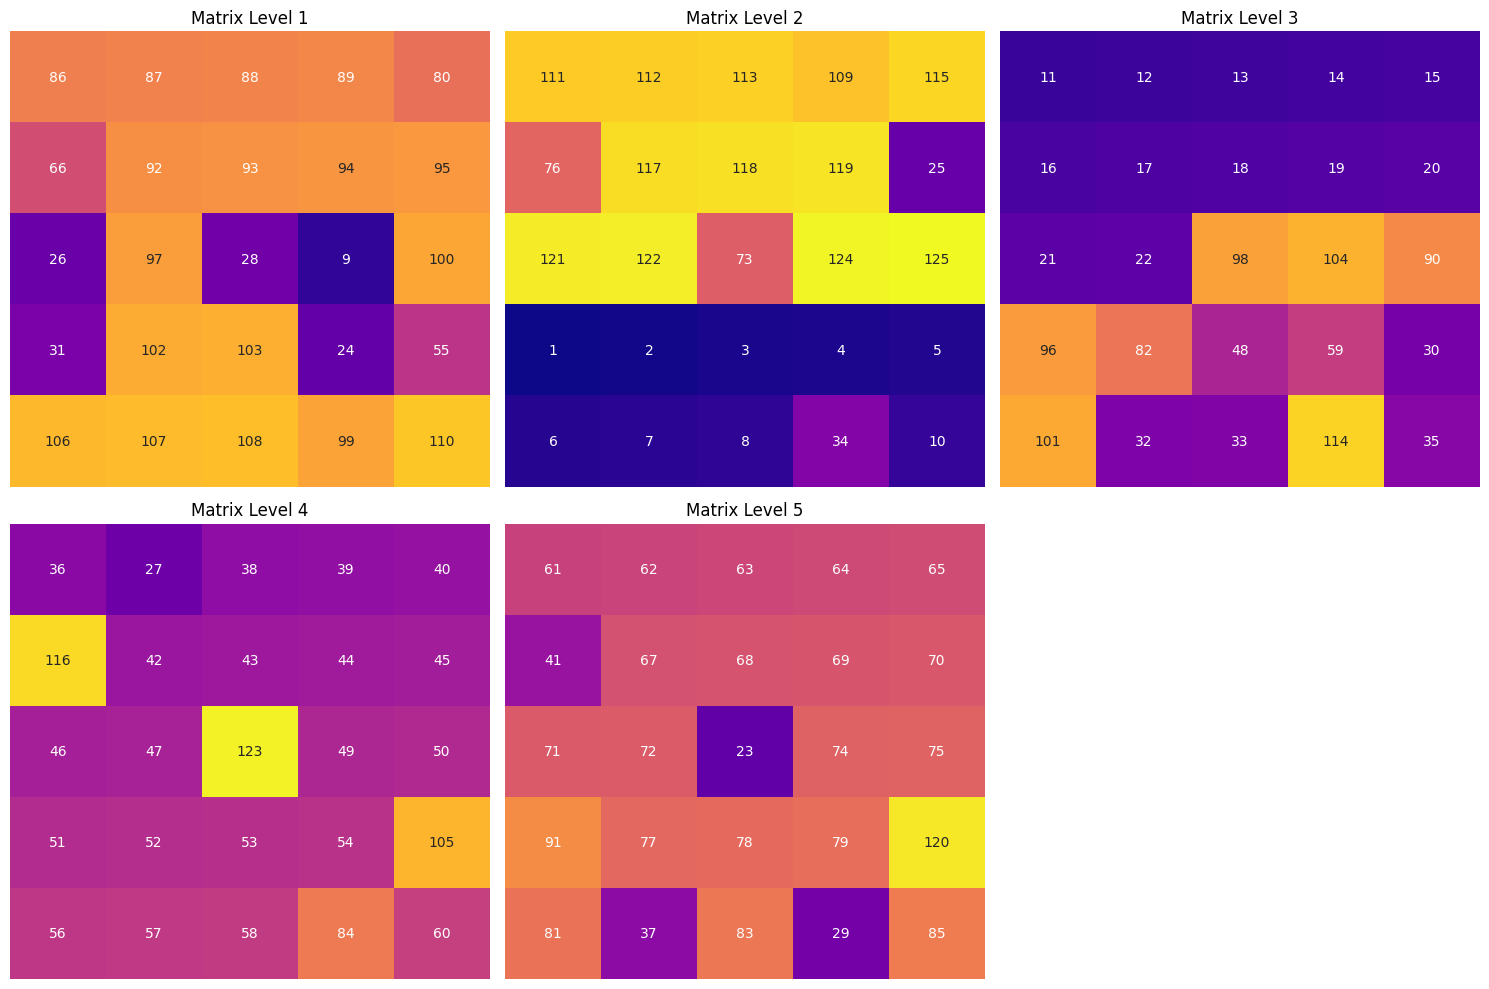

Objective Function Value:  43


In [38]:
displayMatrixLayers(cubes_each_experiment[2][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][-1])

#### 1.3.3. Objective Function Value Plot on Each Iteration

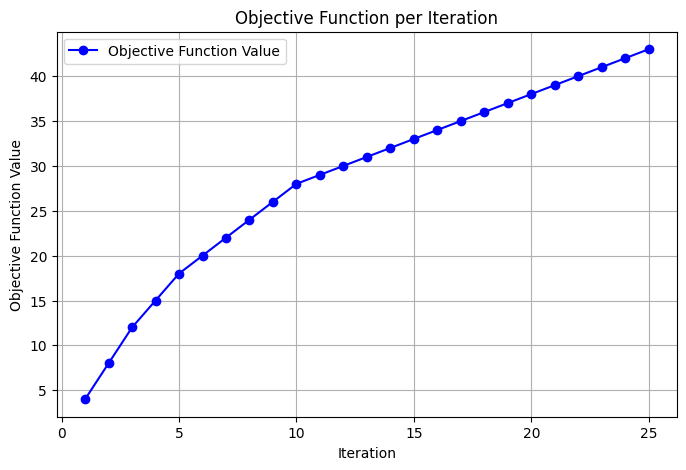

In [39]:
displayPlotValuePerIteration(values_each_experiment[2])

## 2. Hill-climbing with Sideways Move

### 2.0. Program

In [40]:
from HillClimbingWithSidewaysMove import HillClimbingWithSidewaysMoveCube
param_max_sideways = 10
exec_time_each_experiment = []
cubes_tiap_percobaan = []
values_tiap_percobaan = []
iteration_tiap_percobaan = []
cubes_each_experiment = []

for cube in init_cubes:
    start_time = time.perf_counter()
    cubes, values, count_iter = HillClimbingWithSidewaysMoveCube(cube, param_max_sideways)
    end_time = time.perf_counter()
    
    exec_time_each_experiment.append(end_time-start_time)
    cubes_tiap_percobaan.append(cubes)
    values_tiap_percobaan.append(values)
    iteration_tiap_percobaan.append(count_iter)

Current val: 14 | Neighbor Val: 14 | Sideways Count: 0
Current val: 15 | Neighbor Val: 15 | Sideways Count: 0
Current val: 16 | Neighbor Val: 16 | Sideways Count: 0
Current val: 17 | Neighbor Val: 17 | Sideways Count: 0
Current val: 19 | Neighbor Val: 19 | Sideways Count: 0
Current val: 20 | Neighbor Val: 20 | Sideways Count: 0
Current val: 22 | Neighbor Val: 22 | Sideways Count: 0
Current val: 23 | Neighbor Val: 23 | Sideways Count: 0
Current val: 24 | Neighbor Val: 24 | Sideways Count: 0
Current val: 25 | Neighbor Val: 25 | Sideways Count: 0
Current val: 26 | Neighbor Val: 26 | Sideways Count: 0
Current val: 27 | Neighbor Val: 27 | Sideways Count: 0
Current val: 28 | Neighbor Val: 28 | Sideways Count: 0
Current val: 29 | Neighbor Val: 29 | Sideways Count: 0
Current val: 30 | Neighbor Val: 30 | Sideways Count: 0
Current val: 31 | Neighbor Val: 31 | Sideways Count: 0
Current val: 32 | Neighbor Val: 32 | Sideways Count: 0
Current val: 33 | Neighbor Val: 33 | Sideways Count: 0
Current va

### 2.1. First Experiment Result

In [41]:
print("Total iteration: ", iteration_each_experiment[0])
print("Execution time: ", exec_time_each_experiment[0])

Total iteration:  30
Execution time:  33.27193425002042


#### 2.1.1. Initial State

In [70]:
displayMatrixLayers(cubes_tiap_percobaan[0][0].to_3d_array())
print(len(cubes_each_experiment))
print("Objective Function Value: ", values_each_experiment[0][0])

IndexError: list index out of range

#### 2.1.2. Final State

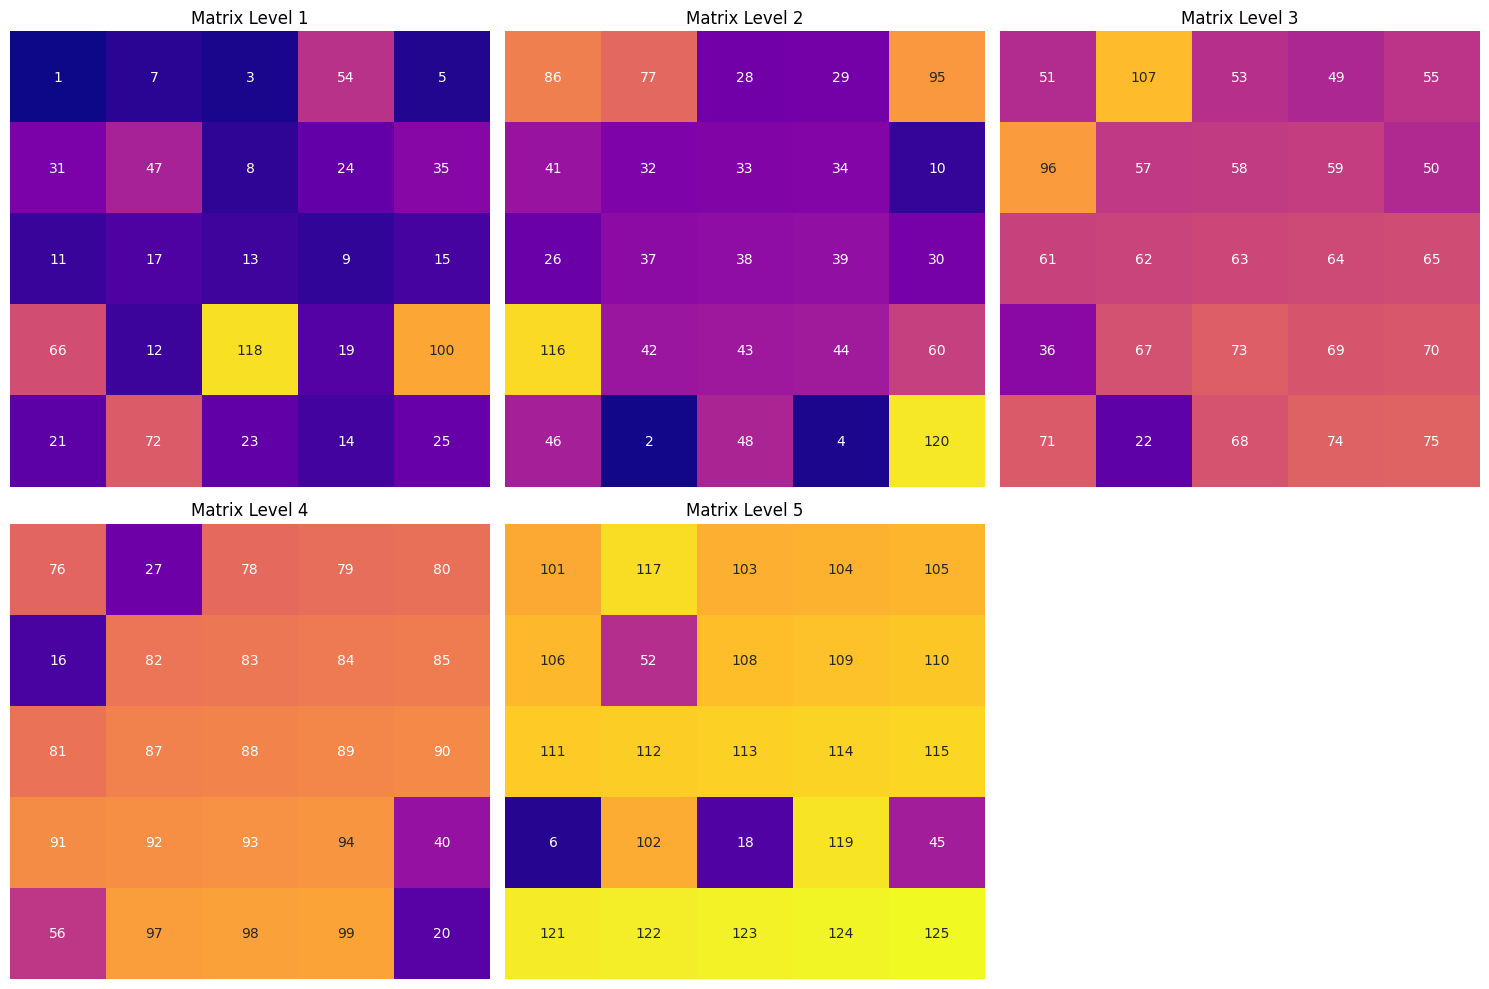

Objective Function Value:  44


In [43]:
displayMatrixLayers(cubes_each_experiment[0][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][-1])

#### 2.1.3. Objective Function Value Plot on Each Iteration

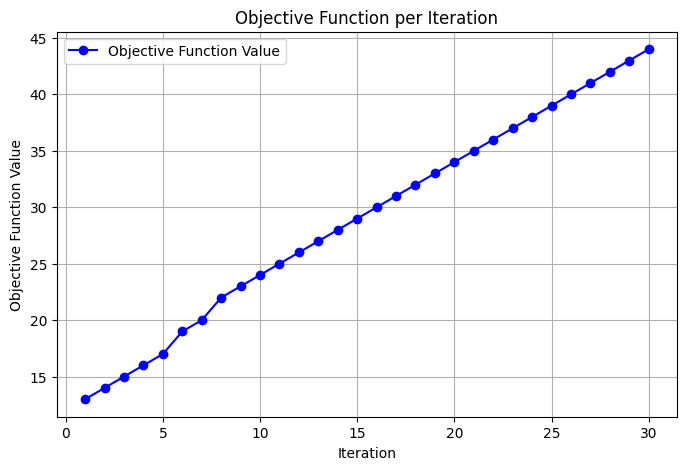

In [44]:
displayPlotValuePerIteration(values_each_experiment[0])

### 2.2. Second Experiment Result

In [45]:
print("Total iteration: ", iteration_each_experiment[1])
print("Execution time: ", exec_time_each_experiment[1])

Total iteration:  28
Execution time:  33.09463454200886


#### 2.2.1. Initial State

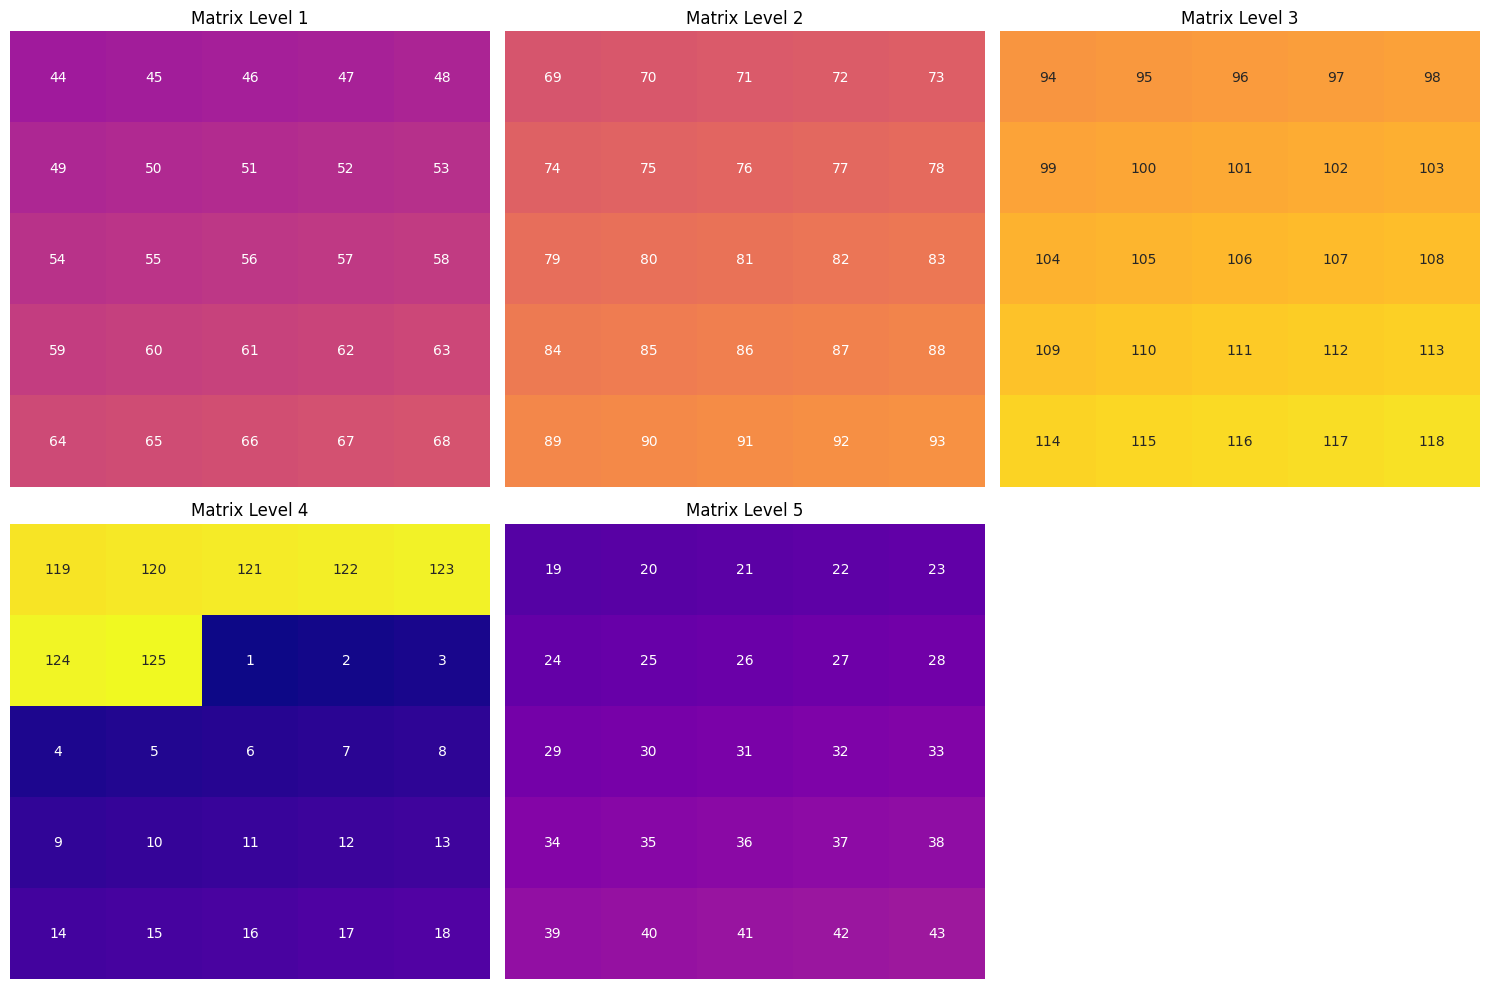

Objective Function Value:  1


In [46]:
displayMatrixLayers(cubes_each_experiment[1][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][0])

#### 2.2.2. Final State

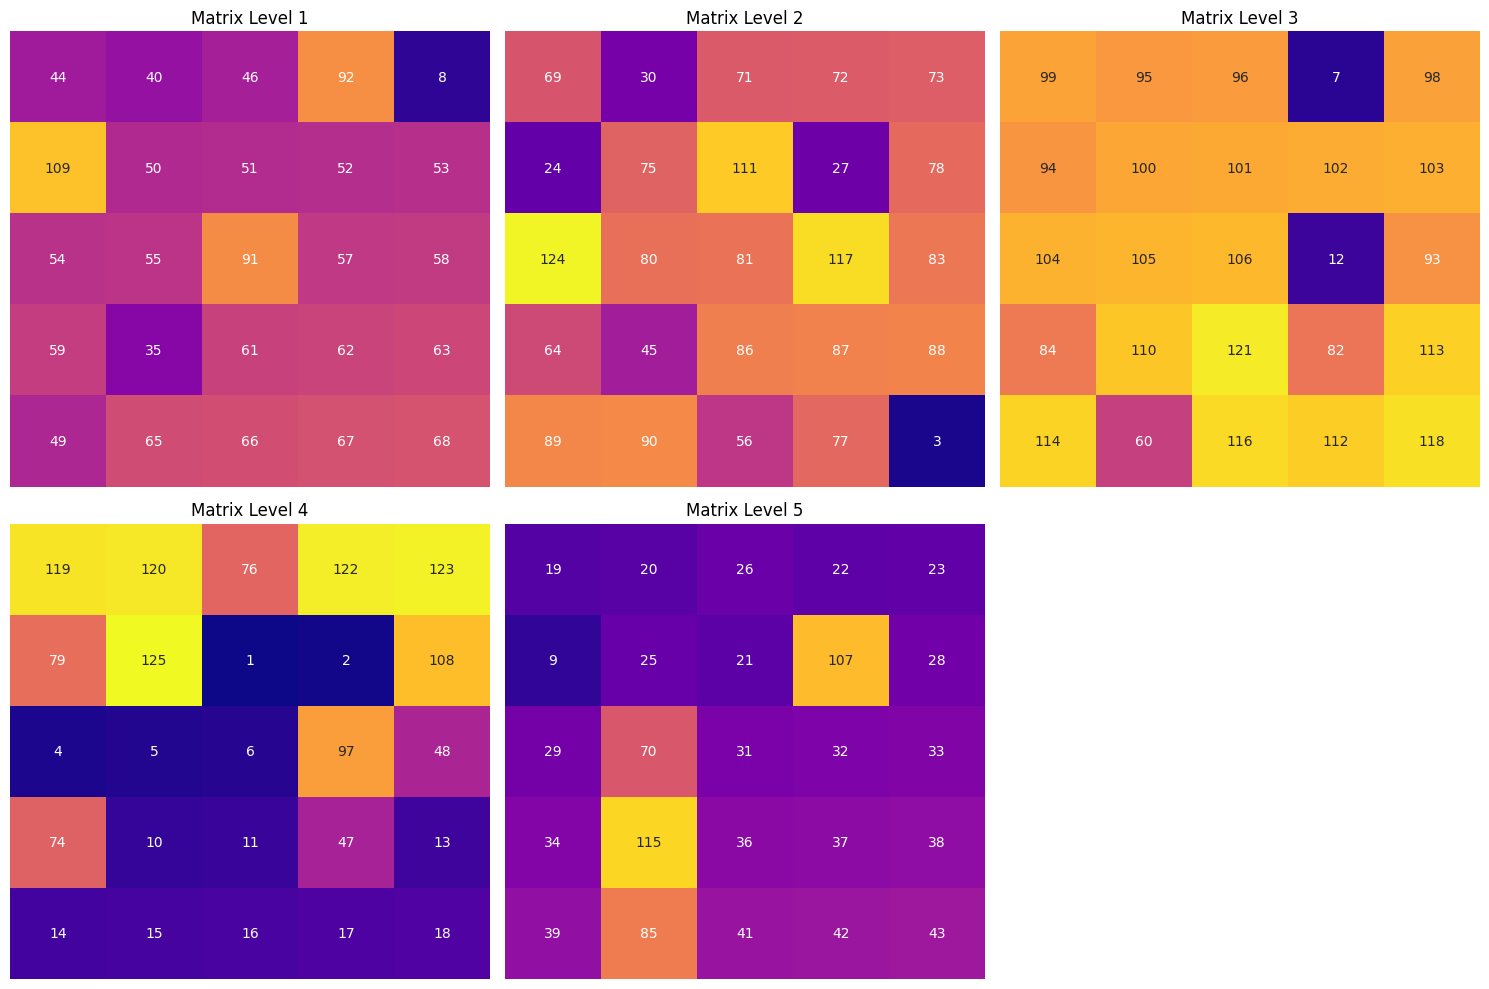

Objective Function Value:  43


In [47]:
displayMatrixLayers(cubes_each_experiment[1][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][-1])

#### 2.2.3. Objective Function Value Plot on Each Iteration

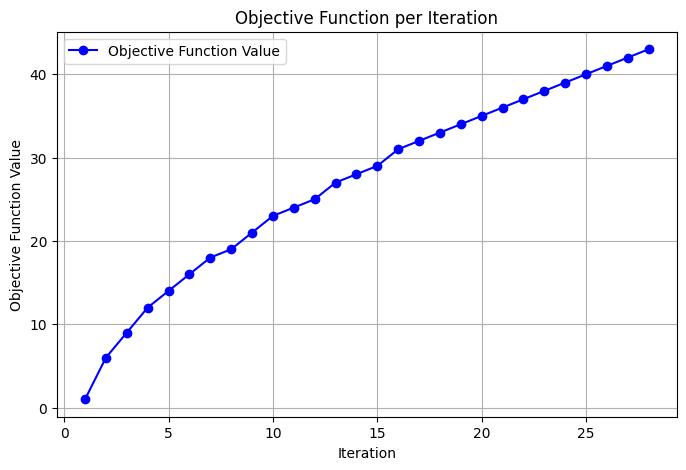

In [48]:
displayPlotValuePerIteration(values_each_experiment[1])

### 2.3. Third Experiment Result

In [49]:
print("Total iteration: ", iteration_each_experiment[2])
print("Execution time: ", exec_time_each_experiment[2])

Total iteration:  25
Execution time:  30.96994529105723


#### 2.3.1. Initial State

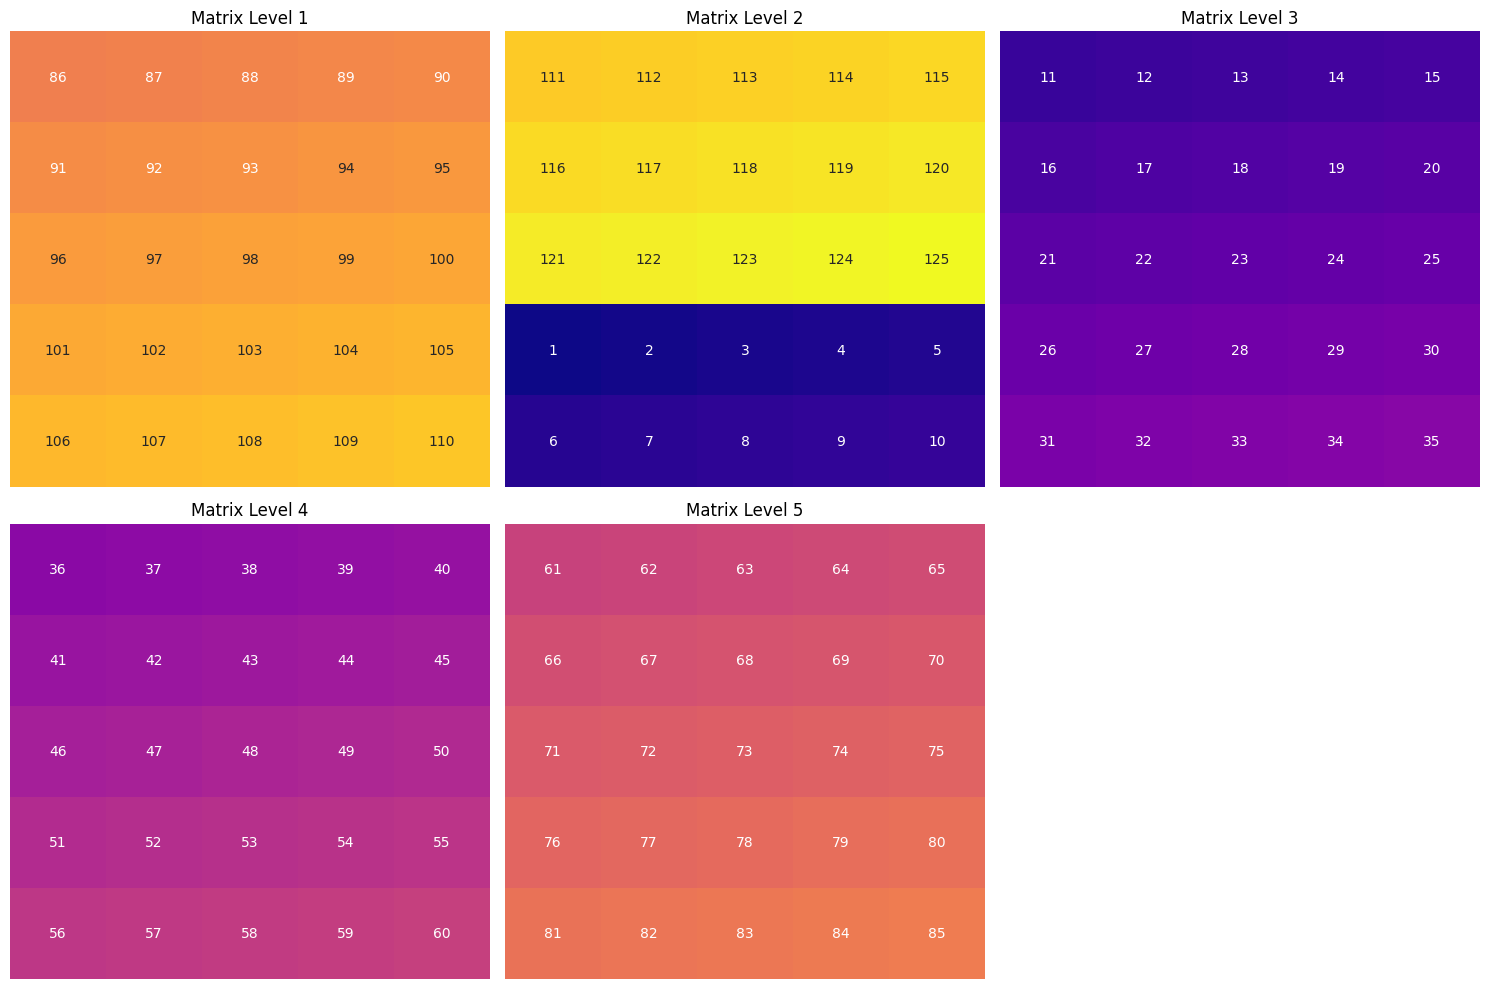

Objective Function Value:  4


In [50]:
displayMatrixLayers(cubes_each_experiment[2][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][0])

#### 2.3.2. Final State

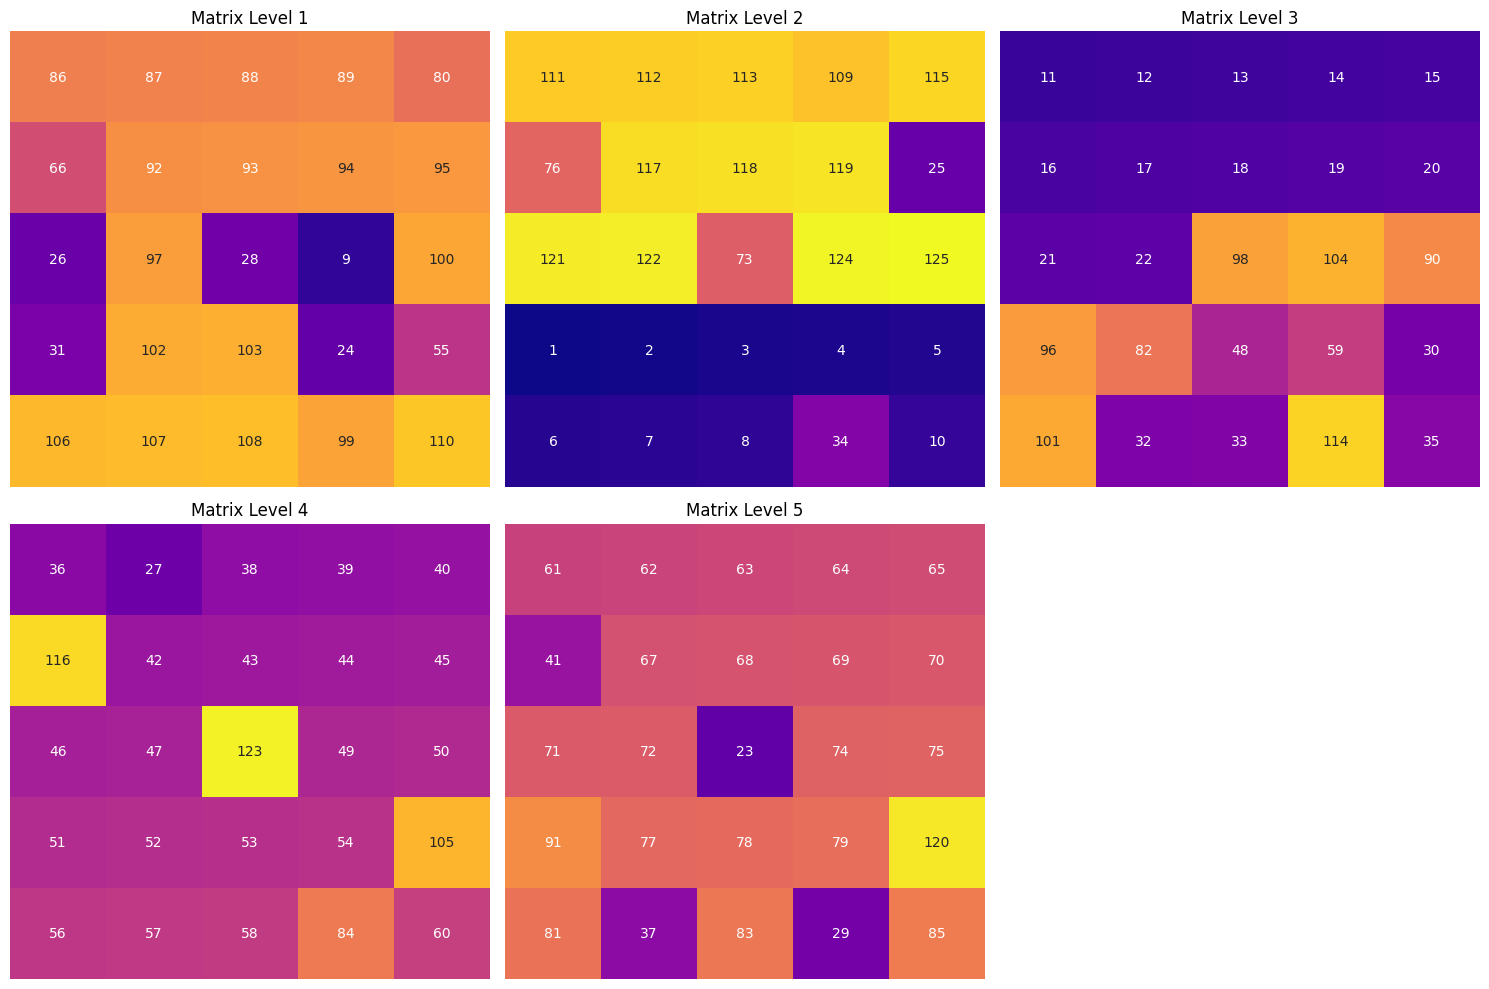

Objective Function Value:  43


In [51]:
displayMatrixLayers(cubes_each_experiment[2][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][-1])

#### 2.3.3. Objective Function Value Plot on Each Iteration

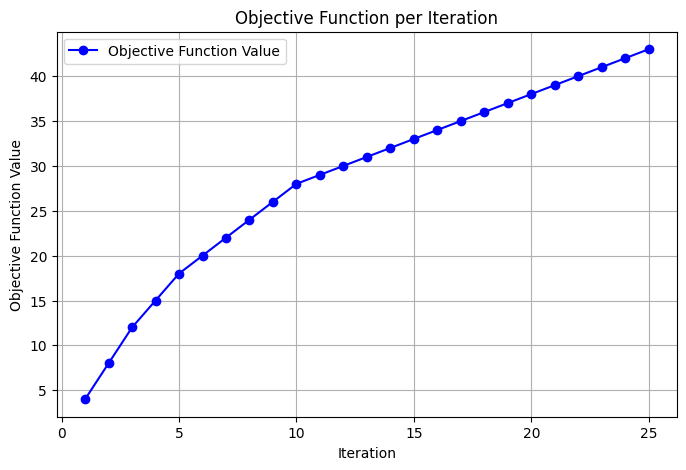

In [52]:
displayPlotValuePerIteration(values_each_experiment[2])

## 3. Random Restart Hill-climbing

### 3.0. Program

In [53]:
from RandomRestartHillClimbing import RandomRestartHillClimbingCube
param_max_restart = 3
exec_time_each_experiment = []
cubesPerRestart_tiap_percobaan = []
valuesPerRestart_tiap_percobaan = []
iterationPerRestart_tiap_percobaan = []
restart_tiap_percobaan = []
for cube in init_cubes:
    start_time = time.perf_counter()
    cubes, values, iterations, restarts = RandomRestartHillClimbingCube(cube, param_max_restart)
    end_time = time.perf_counter()
    
    exec_time_each_experiment.append(end_time-start_time)
    cubesPerRestart_tiap_percobaan.append(cubes)
    valuesPerRestart_tiap_percobaan.append(values)
    iterationPerRestart_tiap_percobaan.append(iterations)
    restart_tiap_percobaan.append(restarts)

Current val:  13
Current val:  14
Current val:  15
Current val:  16
Current val:  17
Current val:  19
Current val:  20
Current val:  22
Current val:  23
Current val:  24
Current val:  25
Current val:  26
Current val:  27
Current val:  28
Current val:  29
Current val:  30
Current val:  31
Current val:  32
Current val:  33
Current val:  34
Current val:  35
Current val:  36
Current val:  37
Current val:  38
Current val:  39
Current val:  40
Current val:  41
Current val:  42
Current val:  43
Current val:  44
Best value at restart 0 = 44
Current val:  0
Current val:  1
Current val:  3
Current val:  5
Current val:  6
Current val:  7
Current val:  8
Current val:  9
Current val:  10
Current val:  11
Current val:  12
Current val:  13
Current val:  14
Current val:  15
Current val:  16
Current val:  17
Current val:  18
Current val:  19
Current val:  20
Current val:  21
Current val:  22
Current val:  23
Current val:  24
Current val:  25
Current val:  26
Current val:  27
Current val:  28
Current va

### 3.1. First Experiment Result

In [54]:
print("Total iteration: ", iteration_each_experiment[0])
print("Execution time: ", exec_time_each_experiment[0])

Total iteration:  30
Execution time:  112.37755062500946


#### 3.1.1. Initial State

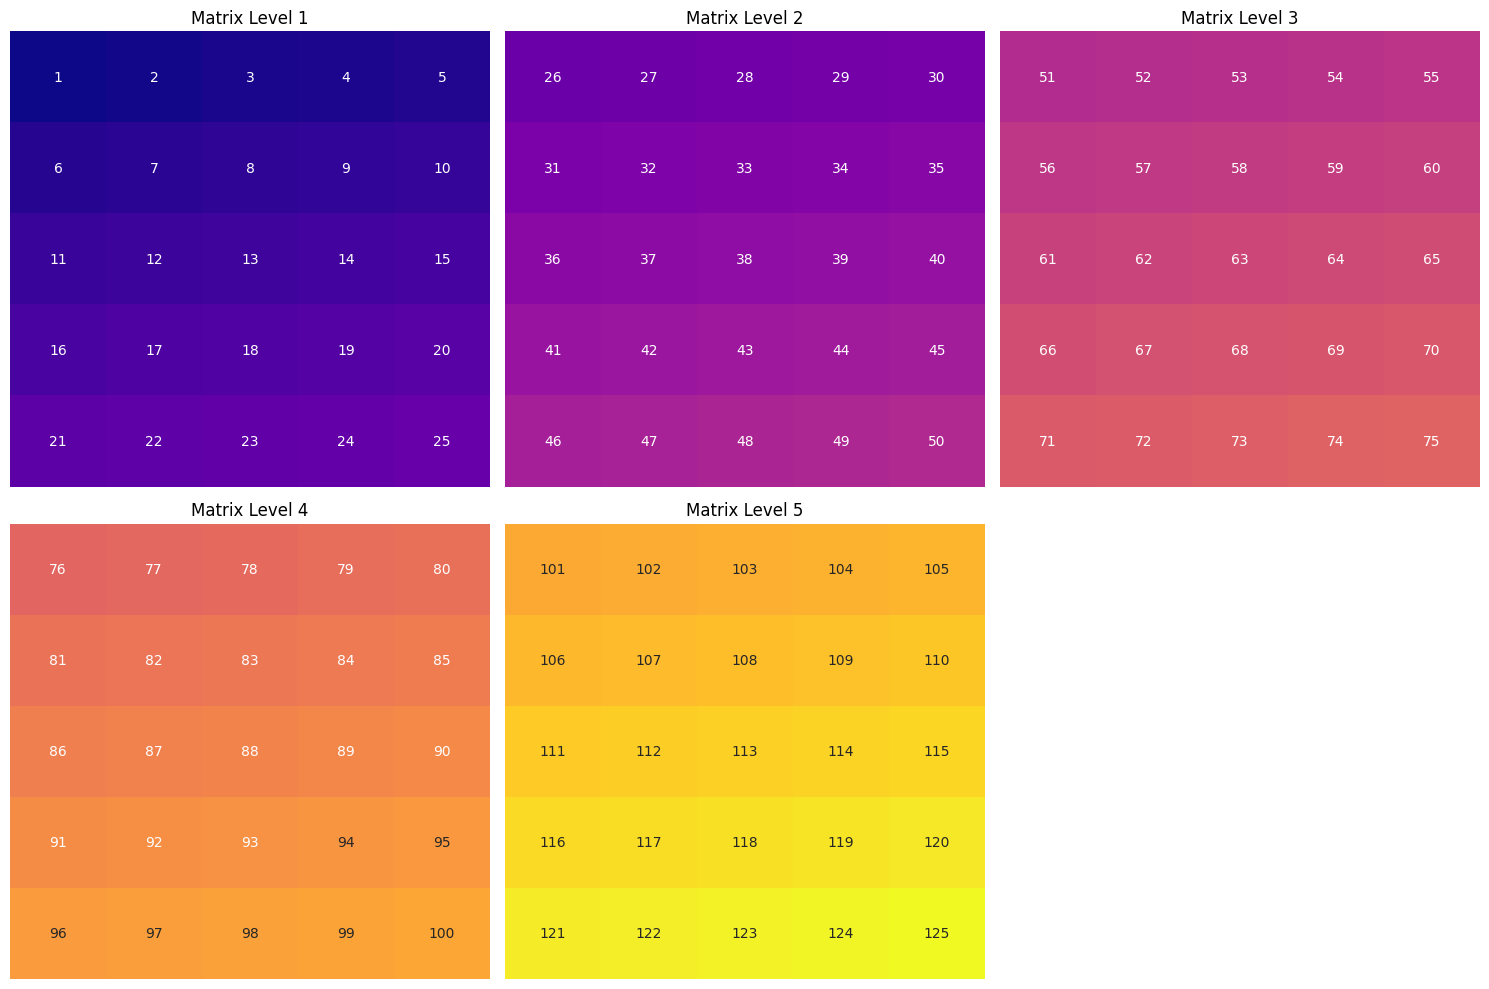

Objective Function Value:  13


In [55]:
displayMatrixLayers(cubes_each_experiment[0][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][0])

#### 3.1.2. Final State

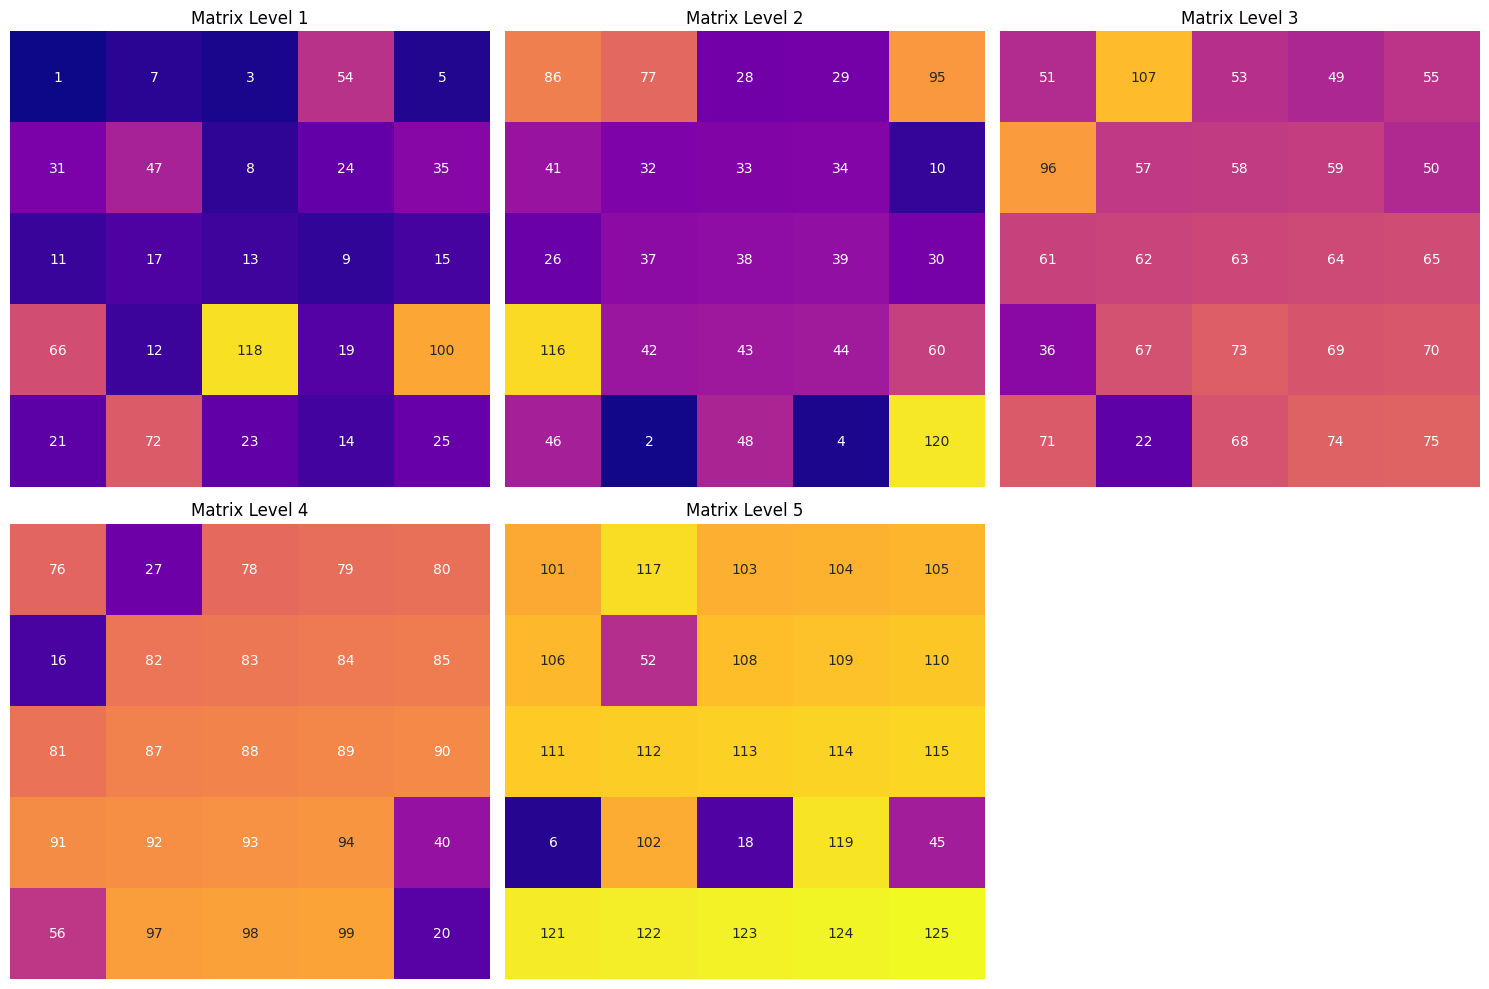

Objective Function Value:  44


In [56]:
displayMatrixLayers(cubes_each_experiment[0][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][-1])

#### 3.1.3. Objective Function Value Plot on Each Iteration

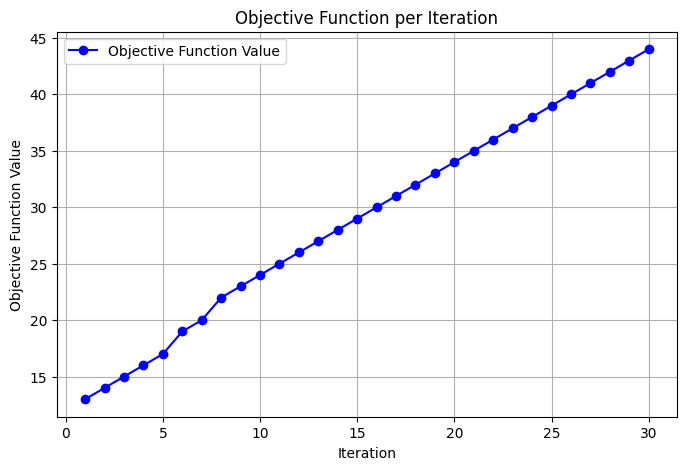

In [57]:
displayPlotValuePerIteration(values_each_experiment[0])

### 3.2. Second Experiment Result

In [58]:
print("Total iteration: ", iteration_each_experiment[1])
print("Execution time: ", exec_time_each_experiment[1])

Total iteration:  28
Execution time:  97.89506541599985


#### 3.2.1. Initial State

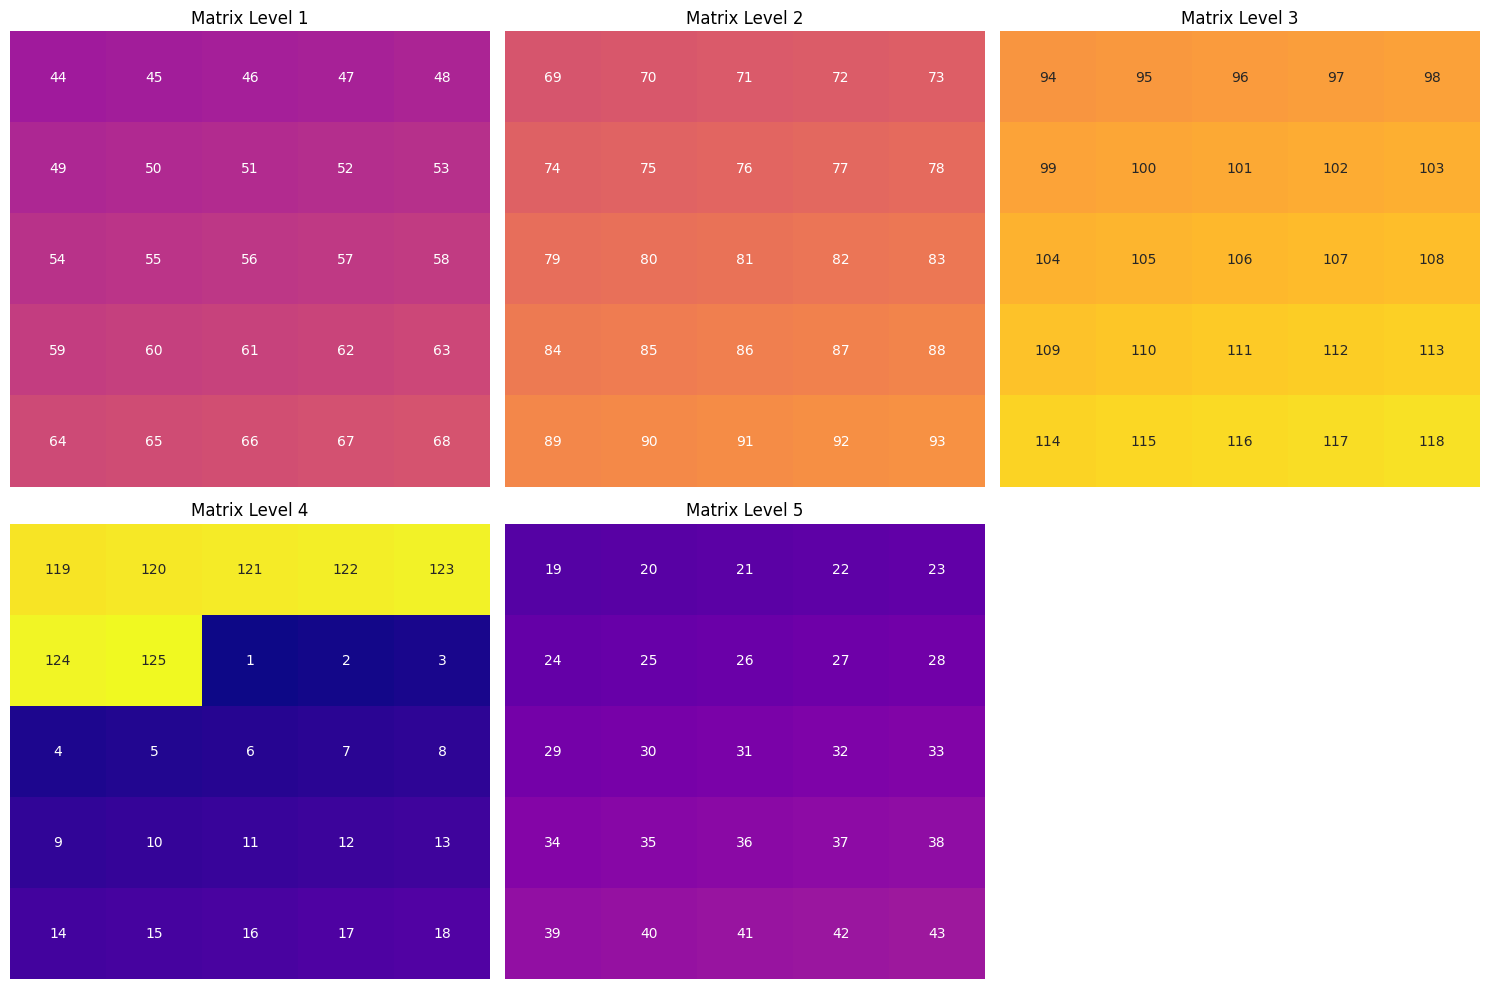

Objective Function Value:  1


In [59]:
displayMatrixLayers(cubes_each_experiment[1][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][0])

#### 3.2.2. Final State

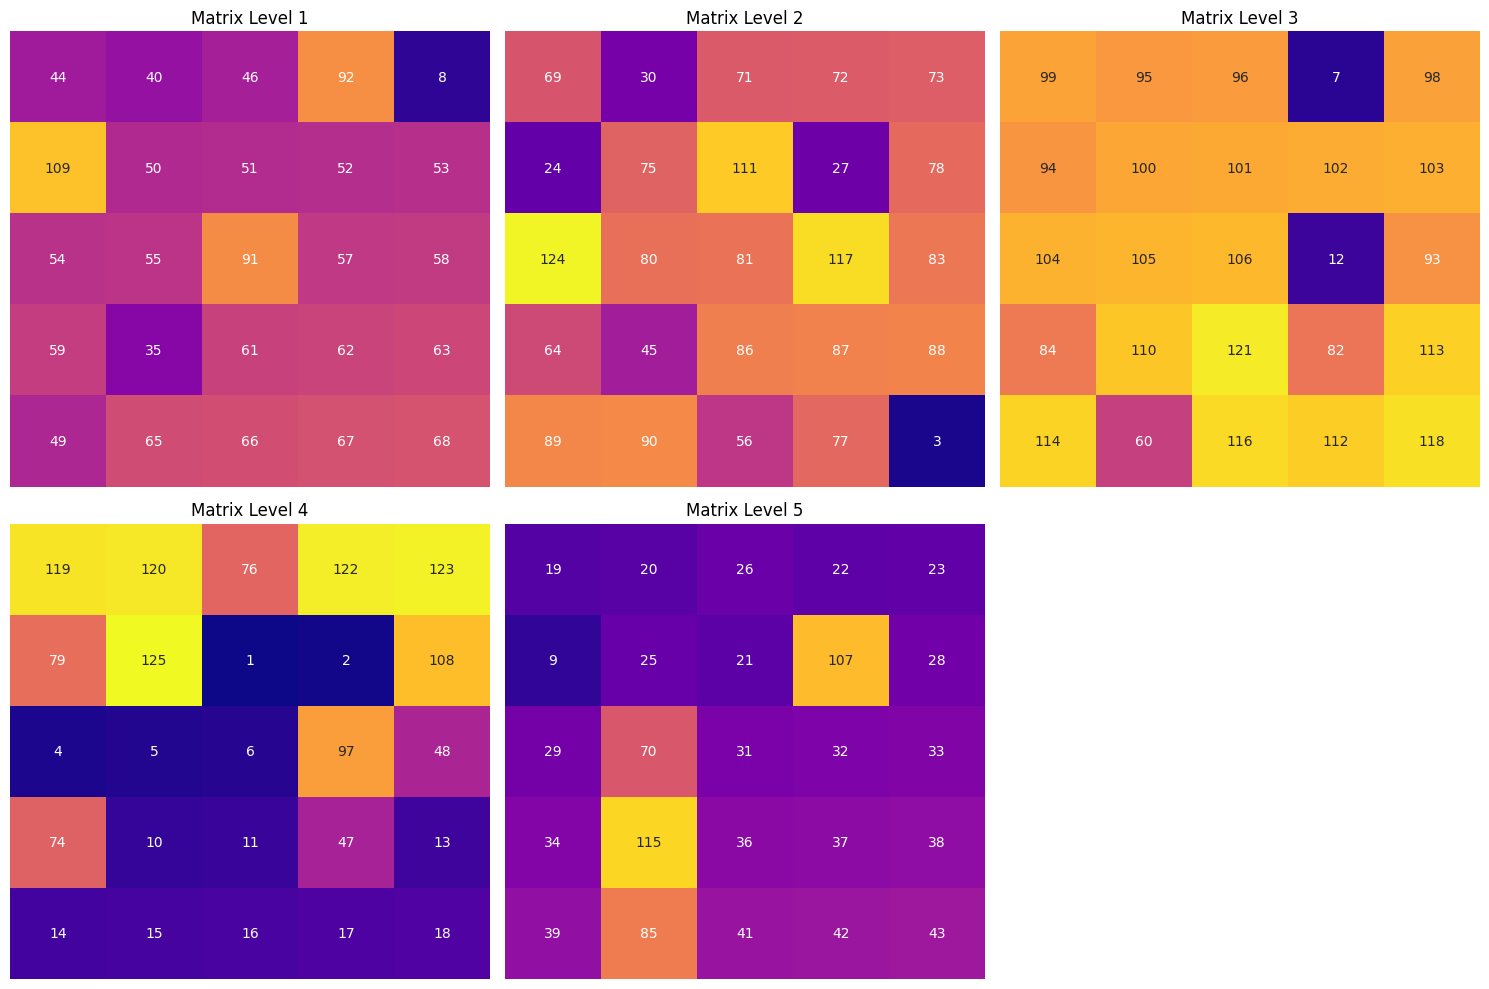

Objective Function Value:  43


In [60]:
displayMatrixLayers(cubes_each_experiment[1][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][-1])

#### 3.2.3. Objective Function Value Plot on Each Iteration

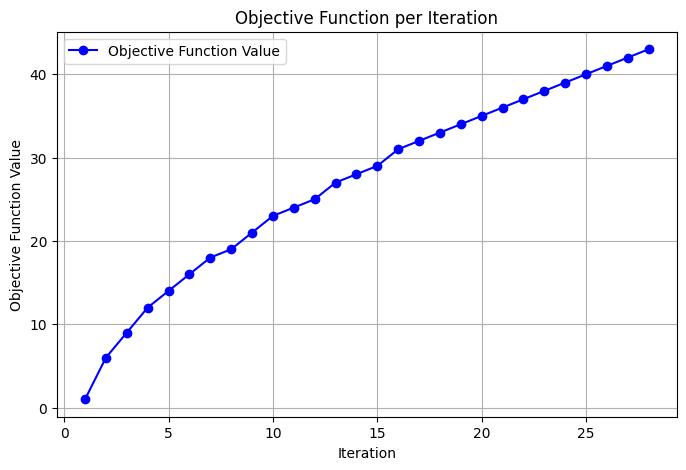

In [61]:
displayPlotValuePerIteration(values_each_experiment[1])

### 3.3. Third Experiment Result

In [62]:
print("Total iteration: ", iteration_each_experiment[2])
print("Execution time: ", exec_time_each_experiment[2])

Total iteration:  25
Execution time:  107.2881485420512


#### 3.3.1. Initial State

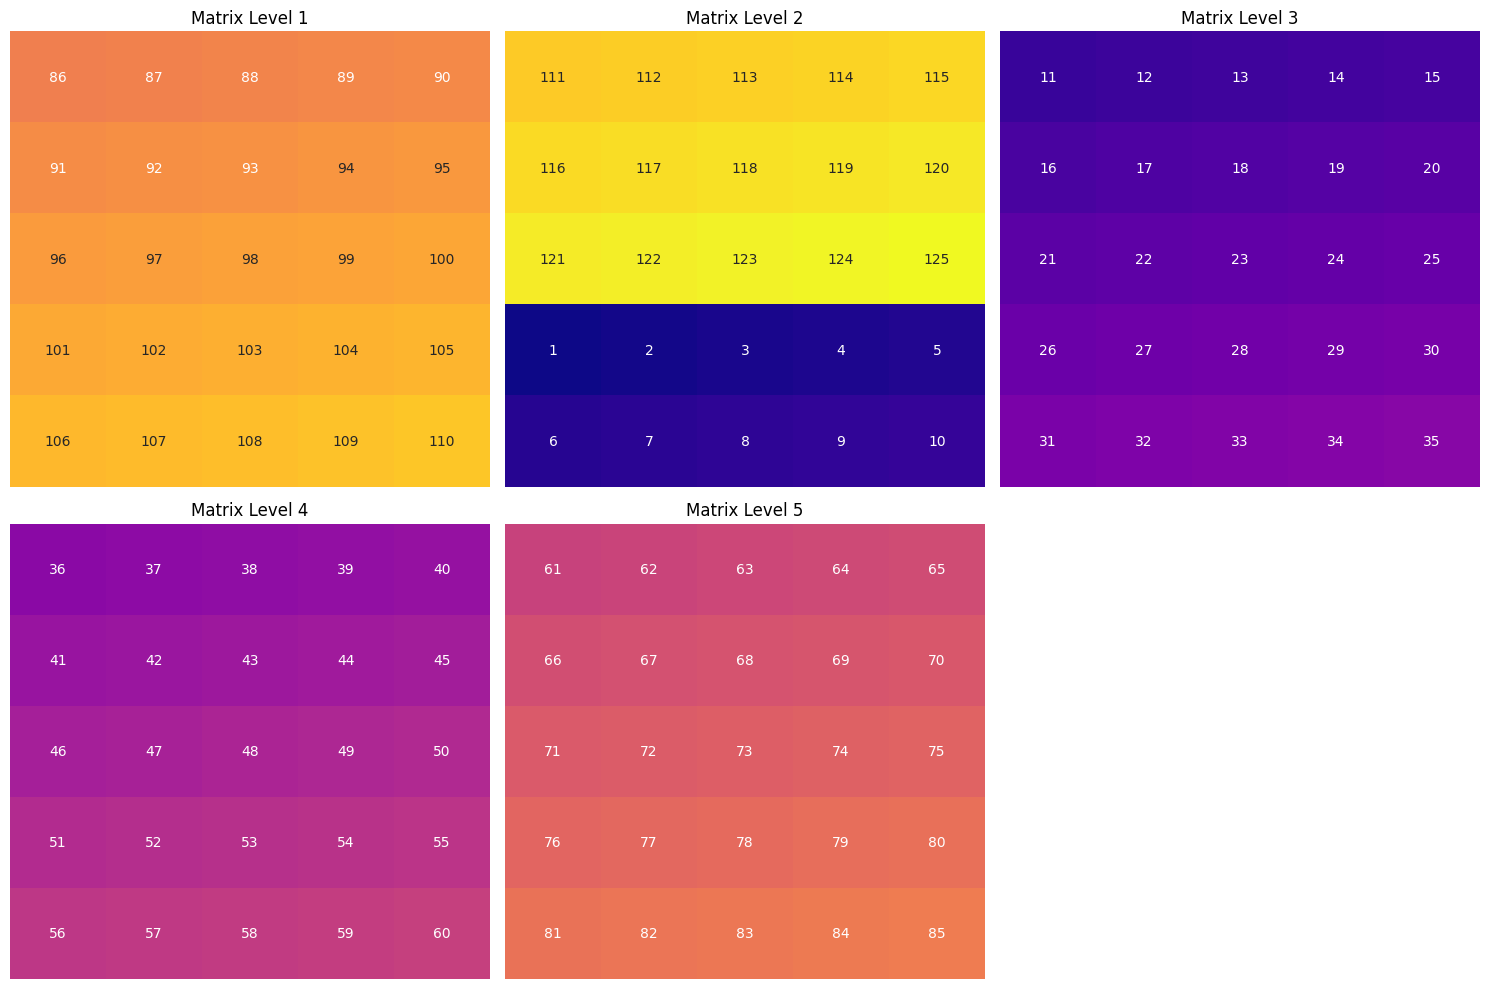

Objective Function Value:  4


In [63]:
displayMatrixLayers(cubes_each_experiment[2][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][0])

#### 3.3.2. Final State

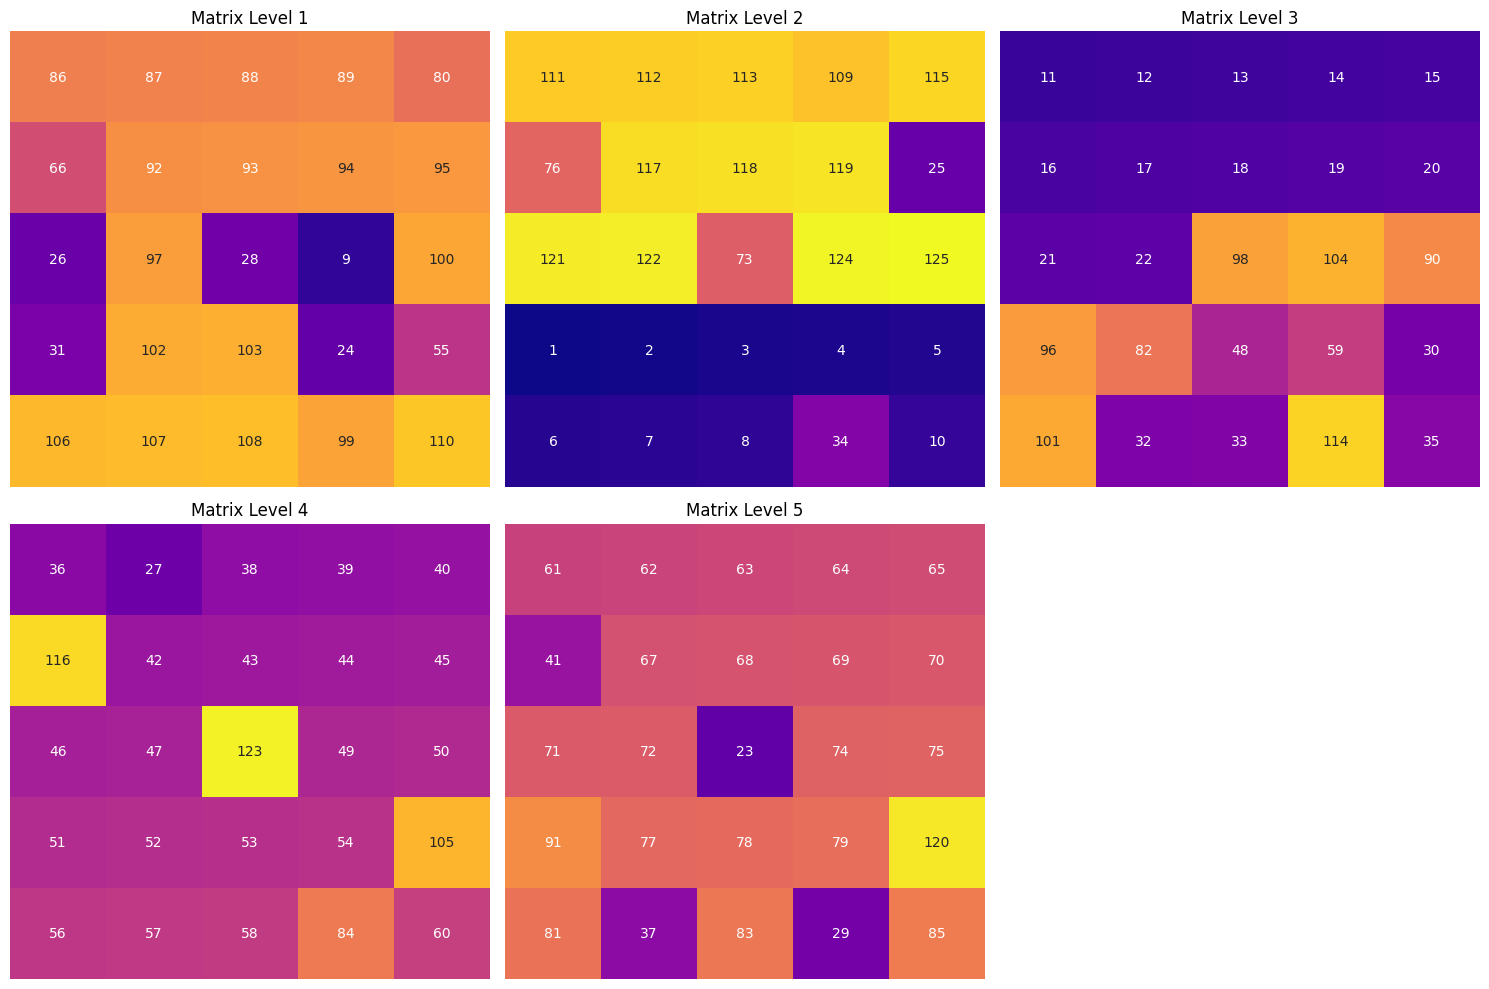

Objective Function Value:  43


In [64]:
displayMatrixLayers(cubes_each_experiment[2][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][-1])

#### 3.3.3. Objective Function Value Plot on Each Iteration

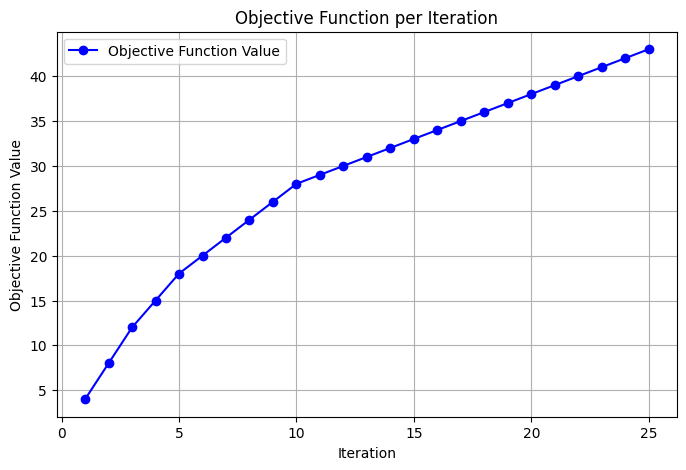

In [65]:
displayPlotValuePerIteration(values_each_experiment[2])

## 4. Stochastic Hill-climbing

### 4.0. Program

In [66]:
from StochasticHillClimbing import StochasticHillClimbingCube
param_iteration = 100
exec_time_each_experiment = []
cubes_tiap_percobaan = []
values_tiap_percobaan = []
iteration_tiap_percobaan = []
for cube in init_cubes:
    start_time = time.perf_counter()
    cubes, values, count_iter = StochasticHillClimbingCube(cube, param_iteration)
    end_time = time.perf_counter()
    
    exec_time_each_experiment(end_time-start_time)
    cubes_tiap_percobaan.append(cubes)
    values_tiap_percobaan.append(values)
    iteration_tiap_percobaan.append(count_iter)

Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13
Val: 13


TypeError: 'list' object is not callable

### 4.1. First Experiment Result

In [ ]:
print("Total iteration: ", iteration_each_experiment[0])
print("Execution time: ", exec_time_each_experiment[0])

#### 4.1.1. Initial State

In [ ]:
displayMatrixLayers(cubes_each_experiment[0][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][0])

#### 4.1.2. Final State

In [ ]:
displayMatrixLayers(cubes_each_experiment[0][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][-1])

#### 4.1.3. Objective Function Value Plot on Each Iteration

In [ ]:
displayPlotValuePerIteration(values_each_experiment[0])

### 4.2. Second Experiment Result

In [ ]:
print("Total iteration: ", iteration_each_experiment[1])
print("Execution time: ", exec_time_each_experiment[1])

#### 4.2.1. Initial State

In [ ]:
displayMatrixLayers(cubes_each_experiment[1][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][0])

#### 4.2.2. Final State

In [ ]:
displayMatrixLayers(cubes_each_experiment[1][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][-1])

#### 4.2.3. Objective Function Value Plot on Each Iteration

In [ ]:
displayPlotValuePerIteration(values_each_experiment[1])

### 4.3. Third Experiment Result

In [ ]:
print("Total iteration: ", iteration_each_experiment[2])
print("Execution time: ", exec_time_each_experiment[2])

#### 4.3.1. Initial State

In [ ]:
displayMatrixLayers(cubes_each_experiment[2][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][0])

#### 4.3.2. Final State

In [ ]:
displayMatrixLayers(cubes_each_experiment[2][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][-1])

#### 4.3.3. Objective Function Value Plot on Each Iteration

In [ ]:
displayPlotValuePerIteration(values_each_experiment[2])

## 5. Simulated Annealing

### 5.0. Program

In [14]:
from SimulatedAnnealing import SimulatedAnnealingCube
param_initial_T = 500
param_cooling_rate = 0.9
exec_time_each_experiment = []
cubes_each_experiment = []
values_each_experiment = []
iteration_each_experiment = []
e_probs_each_experiment = [] # nilai e^(deltaE/T) per iterasi tiap percobaan
count_stuck_each_experiment = []
for cube in init_cubes:
    start_time = time.perf_counter()
    cubes, values, count_iter, e_probs, count_stuck = SimulatedAnnealingCube(cube, param_initial_T, param_cooling_rate)
    end_time = time.perf_counter()
    exec_time_each_experiment.append(end_time-start_time)
    
    cubes_each_experiment.append(cubes)
    values_each_experiment.append(values)
    iteration_each_experiment.append(count_iter)
    e_probs_each_experiment.append(e_probs)
    count_stuck_each_experiment.append(count_stuck)

### 5.1. First Experiment Result

In [15]:
print("Total iteration: ", iteration_each_experiment[0])
print("Execution time: ", exec_time_each_experiment[0])

#### 5.1.1. Initial State

In [16]:
displayMatrixLayers(cubes_each_experiment[0][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][0])

#### 5.1.2. Final State

In [17]:
displayMatrixLayers(cubes_each_experiment[0][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][-1])

#### 5.1.3. Objective Function Value Plot on Each Iteration

In [23]:
displayPlotValuePerIteration(values_each_experiment[0])
displayPlotProbabilityMove(e_probs_each_experiment[0])

### 5.2. Second Experiment Result

In [20]:
print("Total iteration: ", iteration_each_experiment[1])
print("Execution time: ", exec_time_each_experiment[1])

#### 5.2.1. Initial State

In [21]:
displayMatrixLayers(cubes_each_experiment[1][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][0])

#### 5.2.2. Final State

In [22]:
displayMatrixLayers(cubes_each_experiment[1][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][-1])

#### 5.2.3. Objective Function Value Plot on Each Iteration

In [24]:
displayPlotValuePerIteration(values_each_experiment[1])
displayPlotProbabilityMove(e_probs_each_experiment[1])

### 5.3. Third Experiment Result

In [25]:
print("Total iteration: ", iteration_each_experiment[2])
print("Execution time: ", exec_time_each_experiment[2])

#### 5.3.1. Initial State

In [26]:
displayMatrixLayers(cubes_each_experiment[2][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][0])

#### 5.3.2. Final State

In [27]:
displayMatrixLayers(cubes_each_experiment[2][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][-1])

#### 5.3.3. Objective Function Value Plot on Each Iteration

In [28]:
displayPlotValuePerIteration(values_each_experiment[2])
displayPlotProbabilityMove(e_probs_each_experiment[2])

## 6. Genetic Algorithm

### 6.0. Program

### 6.1. First Experiment Result

#### 6.1.1. Initial State

#### 6.1.2. Final State

#### 6.1.3. Objective Function Value Plot on Each Iteration

### 6.2. Second Experiment Result

#### 6.2.1. Initial State

#### 6.2.2. Final State

#### 6.2.3. Objective Function Value Plot on Each Iteration

### 6.3. Third Experiment Result

#### 6.3.1. Initial State

#### 6.3.2. Final State

#### 6.3.3. Objective Function Value Plot on Each Iteration